In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
import sweetviz as sv
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import classification_report, roc_curve,roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score
from sklearn.naive_bayes import  GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import metrics
import gzip
from yellowbrick.model_selection import feature_importances, FeatureImportances

In [28]:
df = pd.read_csv(r"F:\ML Projects\Banking\train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [29]:
df.shape

(100000, 28)

In [30]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [32]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [33]:
df['Num_Bank_Accounts'].value_counts()

6     13175
7     12999
8     12940
4     12343
5     12298
3     12107
9      5503
10     5329
1      4540
0      4417
2      4340
11        9
Name: Num_Bank_Accounts, dtype: int64

In [34]:
df['Num_of_Loan'].value_counts()

3    15752
2    15712
4    15456
0    11408
1    11128
6     8144
7     7680
5     7528
9     3856
8     3336
Name: Num_of_Loan, dtype: int64

In [35]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [36]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [37]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [38]:

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan).fillna(method='bfill')


In [39]:
df['Payment_of_Min_Amount'].value_counts()

Yes    59438
No     40562
Name: Payment_of_Min_Amount, dtype: int64

In [40]:
df['Age'] = df['Age'].astype(int)
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)
df['Credit_Utilization_Ratio'] = df['Credit_Utilization_Ratio'].astype(float)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

# Convert Interest_Rate and Num_of_Loan to float and Credit_History_Age to object
df['Interest_Rate'] = df['Interest_Rate'].astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(float)
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype(float)

# Print the data types to verify the conversion
print(df.dtypes)

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                           int32
SSN                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [41]:
df['Age'].unique()

array([23, 28, 34, 54, 55, 21, 31, 33, 30, 24, 44, 45, 40, 41, 32, 35, 36,
       39, 37, 20, 46, 26, 42, 19, 48, 38, 43, 22, 16, 18, 15, 27, 25, 14,
       17, 47, 53, 56, 29, 49, 51, 50, 52])

In [42]:
df.drop('Type_of_Loan', axis=1, inplace=True)

# Data Visualizaton

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Total_EMI_per_month')
plt.title('Total EMI per Month Over Time')
plt.xlabel('Month')
plt.ylabel('Total EMI per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
unique_months = df['Month'].unique()

plt.figure(figsize=(15, 10))

num_cols = 3  # Number of columns for subplots
num_rows = (len(unique_months) + num_cols - 1) // num_cols  # Number of rows for subplots

for i, month in enumerate(unique_months, start=1):
    plt.subplot(num_rows, num_cols, i)
    data = df[df['Month'] == month]['Num_of_Loan'].value_counts()
    labels = data.index
    plt.pie(data, labels=labels, autopct='%1.1f%%')
    plt.title(f'Distribution of Number of loans in {month} month')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
a = sns.countplot(data=df, x='Payment_Behaviour')
plt.title('Count of Payment Behaviours')
plt.xlabel('Payment Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)


for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 8), 
                 textcoords = 'offset points')
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation', hue='Payment_Behaviour')
plt.title('Count of Payment Behaviour by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Payment Behaviour')
plt.xticks(rotation=45)
plt.show()

In [ ]:

# Distribution plots
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Occupation')
plt.title('Count of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
avg_monthly_balance_by_occupation = df.groupby('Occupation')['Monthly_Balance'].mean().reset_index()

plt.figure(figsize=(10, 8))
a = sns.barplot(data=avg_monthly_balance_by_occupation, x='Occupation', y='Monthly_Balance')
plt.title('Average Monthly Balance by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Monthly Balance')
plt.xticks(rotation=45)
plt.show()

for p in a.patches:
    a.annotate(format(p.get_height(), '.0f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', 
                 xytext = (0, 10), 
                 textcoords = 'offset points')


plt.show()

In [ ]:

# Relationship plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Occupation', y='Annual_Income')
plt.title('Annual Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()


In [ ]:

plt.figure(figsize=(10, 6))
sns.pairplot(df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Credit_Score']])
plt.show()


In [ ]:

# Correlation plot VALUES ONLY
plt.figure(figsize=(22, 12))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [43]:
df.drop(['SSN','ID','Customer_ID', 'Name', 'Month'], axis=1, inplace=True)
df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
my_report = sv.analyze(df)
my_report.show_html('Custom_Report_analysis.html')

In [44]:
df.to_csv('data/df_clean.csv')

# Training the model 

In [45]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [46]:
le = LabelEncoder()

In [47]:
target_col = 'Credit_Score'

X = df.drop(columns=[target_col]) #features

y = df[target_col] # Target Variable



In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Occupation, Payment_of_Min_Amount - label encoding
# Payment_Behaviour, Credit_Mix - Ordinal encoding *



cat = ['Occupation','Payment_of_Min_Amount']

for col in cat:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])



columns_to_encode = ['Payment_Behaviour', 'Credit_Mix']

for col in columns_to_encode:
    X_train[col] = enc.fit_transform(X_train[[col]])
    X_test[col] = enc.transform(X_test[[col]])

In [50]:
X.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [51]:
y.value_counts(normalize=True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: Credit_Score, dtype: float64

In [52]:

print(np.unique(y_train))
y_train = le.fit_transform(y_train)
y_test   = le.transform(y_test)

pd.DataFrame(y_train).value_counts().sort_index()

['Good' 'Poor' 'Standard']


0    14301
1    23124
2    42575
dtype: int64

In [53]:
le.inverse_transform([1])

array(['Poor'], dtype=object)

In [54]:
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [55]:
# Apply SMOTE to balance the target variable
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [56]:
bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfpvalue= pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfpvalue,dfscores],axis=1)
featureScores.columns = ['Specs','pvalue','Score']  #naming the dataframe columns
print(featureScores.nlargest(21,'Score'))  #print 10 best features

                       Specs        pvalue         Score
16     Payment_of_Min_Amount  0.000000e+00  31587.077408
6              Interest_Rate  0.000000e+00  31472.146930
11      Num_Credit_Inquiries  0.000000e+00  23695.336542
8        Delay_from_due_date  0.000000e+00  22845.473683
5            Num_Credit_Card  0.000000e+00  19204.509482
4          Num_Bank_Accounts  0.000000e+00  18770.308757
15        Credit_History_Age  0.000000e+00  18531.891792
13          Outstanding_Debt  0.000000e+00  18065.329669
9     Num_of_Delayed_Payment  0.000000e+00  17826.087082
7                Num_of_Loan  0.000000e+00  14994.363219
12                Credit_Mix  0.000000e+00   7707.717438
10      Changed_Credit_Limit  0.000000e+00   5929.353645
2              Annual_Income  0.000000e+00   4399.088200
3      Monthly_Inhand_Salary  0.000000e+00   4272.379968
20           Monthly_Balance  0.000000e+00   3683.296435
18   Amount_invested_monthly  0.000000e+00   2859.463197
0                        Age  0

In [57]:
drop_columns=['Credit_Utilization_Ratio','Total_EMI_per_month','Occupation']

In [58]:
X_train=X_train.drop(columns=drop_columns)
X_test =X_test.drop(columns=drop_columns)

In [59]:
#ROC dict for TPR and FPR values
roc_dict = {}
#precision recall curve
prc_dict = {}

def modify_roc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for ROC metrics
    """
    
    fpr, tpr, thresholds = roc_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    
    clf_roc_dict = {'fpr':fpr, 'tpr': tpr, 'thresholds': thresholds}
    
    dict_modify[name] = clf_roc_dict
    
def modify_prc_dict(clf, y_test, X_test, name ,dict_modify):
    """
    modifies a dictionary in place and adds keys for precision recall metrics
    """
    
    precision, recall, thresholds = precision_recall_curve(y_test,
                                     clf.predict_proba(X_test)[:,1],
                                     pos_label=1)
    
    clf_prc_dict = {'precision':precision, 'recall': recall, 'thresholds': thresholds}
    
    dict_modify[name] = clf_prc_dict

In [60]:
def fit_score_clf(clf, X_train, y_train, X_test, y_test, name='clf'):
    
    #fit to train data
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
    
    clf_report['clf'] = name  #add clf name as column
    
    return clf_report

In [61]:
lr  = LogisticRegression(penalty='l2',
                         C=1.0,
                         solver = 'lbfgs',
                         max_iter=400,
                         n_jobs=-1)

lr_report = fit_score_clf(lr, X_train, y_train, X_test, y_test, name='lr')
lr_report.head()

,0,1,2,accuracy,macro avg,weighted avg,clf
precision,0.485782,0.620975,0.792696,0.6471,0.633151,0.688137,lr
recall,0.813723,0.676370,0.575432,0.6471,0.688508,0.647100,lr
f1-score,0.608373,0.647490,0.666812,0.6471,0.640892,0.650832,lr
support,3527.000000,5874.000000,10599.000000,0.6471,20000.000000,20000.000000,lr


In [62]:
# metrics for Logistic Regression

modify_roc_dict(clf=lr,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression', 
                dict_modify=roc_dict)
modify_prc_dict(clf=lr,
                y_test=y_test,
                X_test=X_test,
                name='Logistic Regression',
                dict_modify=prc_dict)

In [63]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2)

dt_report = fit_score_clf(dt, X_train, y_train, X_test, y_test, name='Decision Tree')
dt_report.head()


,0,1,2,accuracy,macro avg,weighted avg,clf
precision,0.519390,0.624215,0.850904,0.6759,0.664836,0.725863,Decision Tree
recall,0.801248,0.795199,0.568072,0.6759,0.721506,0.675900,Decision Tree
f1-score,0.630241,0.699409,0.681301,0.6759,0.670317,0.677615,Decision Tree
support,3527.000000,5874.000000,10599.000000,0.6759,20000.000000,20000.000000,Decision Tree


In [64]:
# metrics for Decision Tree Classifier
modify_roc_dict(clf = dt, 
                y_test = y_test,
                X_test = X_test,
                name='Decision Tree',
                dict_modify=roc_dict)
modify_prc_dict(clf=dt,
                y_test=y_test,
                X_test=X_test,
                name='Decision Tree',
                dict_modify=prc_dict)


In [67]:
rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

rf_report = fit_score_clf(rf_clf, X_train, y_train, X_test, y_test, name='rf')
rf_report.head()


,0,1,2,accuracy,macro avg,weighted avg,clf
precision,0.761050,0.795369,0.853312,0.8177,0.803244,0.820024,rf
recall,0.805500,0.859551,0.798566,0.8177,0.821206,0.817700,rf
f1-score,0.782645,0.826215,0.825032,0.8177,0.811297,0.817904,rf
support,3527.000000,5874.000000,10599.000000,0.8177,20000.000000,20000.000000,rf


In [68]:
#metrics for Random Forest Classifier
modify_roc_dict(rf_clf, y_test, X_test, name='RandomForest',dict_modify=roc_dict)
modify_prc_dict(clf=rf_clf,
                y_test=y_test,
                X_test=X_test,
                name='RandomForest',
                dict_modify=prc_dict)


In [69]:

gbtree = GradientBoostingClassifier(learning_rate=0.1, n_estimators = 100)

gbtree_report = fit_score_clf(gbtree, X_train, y_train, X_test, y_test, name='gbtree')
gbtree_report.head()

,0,1,2,accuracy,macro avg,weighted avg,clf
precision,0.531092,0.672608,0.825640,0.69655,0.676447,0.728751,gbtree
recall,0.806351,0.751617,0.629493,0.69655,0.729154,0.696550,gbtree
f1-score,0.640396,0.709921,0.714347,0.69655,0.688221,0.700006,gbtree
support,3527.000000,5874.000000,10599.000000,0.69655,20000.000000,20000.000000,gbtree


In [70]:
#metrics for gbtree
modify_roc_dict(gbtree, y_test, X_test, name='GBTree',dict_modify=roc_dict)
modify_prc_dict(clf=gbtree,
                y_test=y_test,
                X_test=X_test,
                name='GBTree',
                dict_modify=prc_dict)


In [71]:
xgb_clf = xgb.XGBClassifier(n_estimators=300,
                     subsample=0.9,
                            n_jobs=-1)
xgb_report = fit_score_clf(xgb_clf, X_train, y_train, X_test, y_test, name='xgb')
xgb_report.head()

,0,1,2,accuracy,macro avg,weighted avg,clf
precision,0.757349,0.789252,0.830386,0.80455,0.792329,0.805425,xgb
recall,0.774312,0.827545,0.801868,0.80455,0.801242,0.804550,xgb
f1-score,0.765737,0.807945,0.815878,0.80455,0.796520,0.804706,xgb
support,3527.000000,5874.000000,10599.000000,0.80455,20000.000000,20000.000000,xgb


In [72]:
#metrics for XGB Classifier
modify_roc_dict(xgb_clf, y_test, X_test, name='XGBoost',dict_modify=roc_dict)
modify_prc_dict(clf=xgb_clf,
                y_test=y_test,
                X_test=X_test,
                name='XGBoost',
                dict_modify=prc_dict)

In [73]:

svc = SVC(C=1.0, kernel='rbf',
          gamma='auto', 
          probability=True,
          max_iter=400)

svc_report = fit_score_clf(svc, X_train, y_train, X_test, y_test, name='svc')
svc_report.head()

c:\Users\kadam\anaconda3\envs\streamlitenv\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,0,1,2,accuracy,macro avg,weighted avg,clf
precision,0.019750,0.483998,0.596151,0.4229,0.366633,0.461563,svc
recall,0.030904,0.208546,0.672139,0.4229,0.303863,0.422900,svc
f1-score,0.024099,0.291493,0.631868,0.4229,0.315820,0.424720,svc
support,3527.000000,5874.000000,10599.000000,0.4229,20000.000000,20000.000000,svc


In [74]:
#metrics for SVC Classifier
modify_roc_dict(svc, y_test, X_test, name='SVC',dict_modify=roc_dict)
modify_prc_dict(clf=svc,
                y_test=y_test,
                X_test=X_test,
                name='SVC',
                dict_modify=prc_dict)

In [75]:
knn = KNeighborsClassifier(n_neighbors =5, n_jobs=-1)

knn_report = fit_score_clf(knn, X_train, y_train, X_test, y_test, name='knn')
knn_report.head()

,0,1,2,accuracy,macro avg,weighted avg,clf
precision,0.583236,0.719553,0.861254,0.7413,0.721347,0.770608,knn
recall,0.846328,0.843888,0.649495,0.7413,0.779904,0.741300,knn
f1-score,0.690573,0.776777,0.740534,0.7413,0.735961,0.742368,knn
support,3527.000000,5874.000000,10599.000000,0.7413,20000.000000,20000.000000,knn


In [76]:
#metrics for KNN Classifier
modify_roc_dict(knn, y_test, X_test, name='KNN',dict_modify=roc_dict)
modify_prc_dict(clf=knn,
                y_test=y_test,
                X_test=X_test,
                name='knn',
                dict_modify=prc_dict)

In [77]:
gnb = GaussianNB(priors=None, var_smoothing=1e-9)

gnb_report = fit_score_clf(gnb, X_train, y_train, X_test, y_test, name='gnb')
gnb_report.head()

,0,1,2,accuracy,macro avg,weighted avg,clf
precision,0.418836,0.615937,0.830362,0.60865,0.621711,0.694813,gnb
recall,0.848597,0.730337,0.461364,0.60865,0.680099,0.608650,gnb
f1-score,0.560854,0.668276,0.593159,0.60865,0.607430,0.609524,gnb
support,3527.000000,5874.000000,10599.000000,0.60865,20000.000000,20000.000000,gnb


In [78]:
#metrics for Gaussian Naive Bayes Classifier   
modify_roc_dict(gnb, y_test, X_test, name='Gaussian Naive Bayes',dict_modify=roc_dict)
modify_prc_dict(clf=gnb,
                y_test=y_test,
                X_test=X_test,
                name='Gaussian Naive Bayes',
                dict_modify=prc_dict)

In [79]:
#see keys we have
roc_dict.keys()

dict_keys(['Logistic Regression', 'Decision Tree', 'RandomForest', 'GBTree', 'XGBoost', 'SVC', 'KNN', 'Gaussian Naive Bayes'])

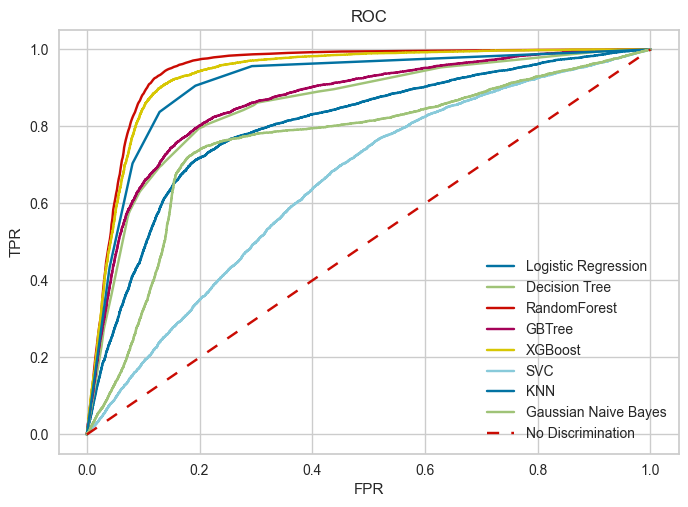

In [80]:
for key in roc_dict:
    clf = roc_dict[key]
    plt.plot(clf['fpr'], clf['tpr'], label=key)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(5, 5))
plt.legend()
plt.show()

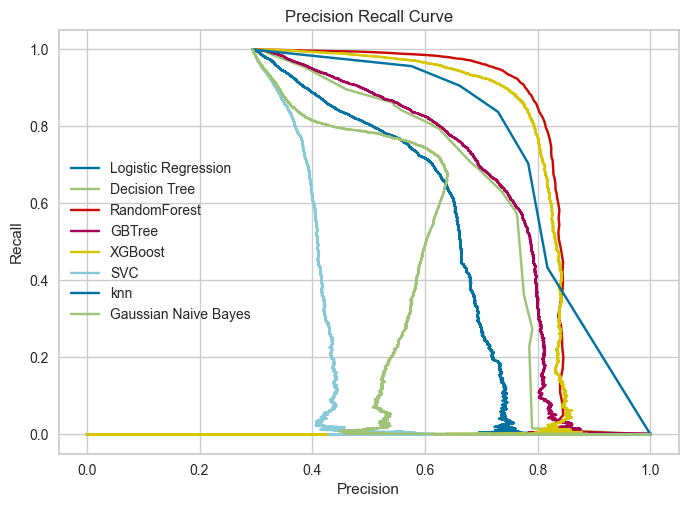

In [81]:
for key in prc_dict:
    clf = prc_dict[key]
    plt.plot(clf['precision'], clf['recall'], label=key)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("Precision Recall Curve")
plt.legend()
plt.show()

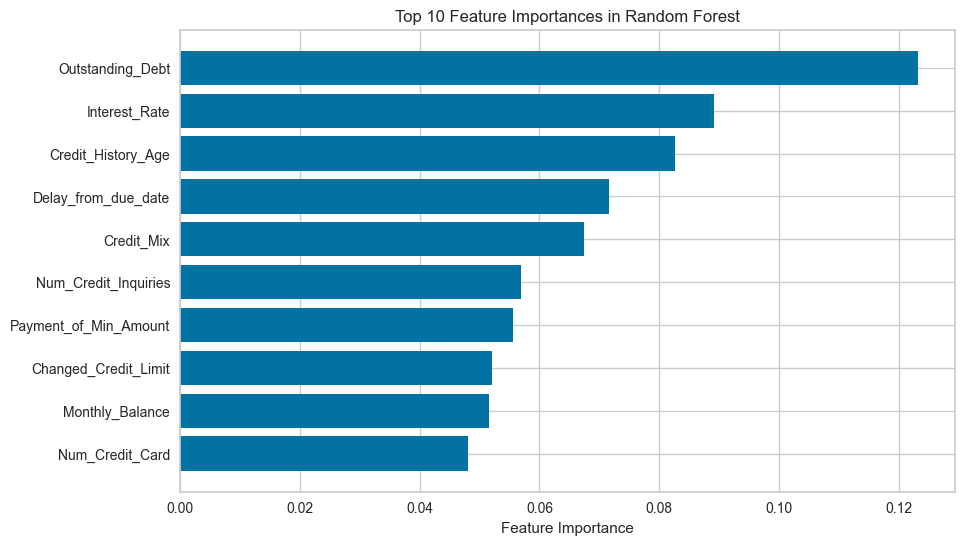

In [82]:
importances = rf_clf.feature_importances_

# Get indices of top features
indices = np.argsort(importances)[::-1]

# Select top features and their importances
top_features = X_train.columns[indices][:10]
top_importances = importances[indices][:10]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features on top
plt.show()

In [83]:
y_pred=rf_clf.predict(X_test)
y_prob=rf_clf.predict_proba(X_test)

In [84]:
print(metrics.confusion_matrix(y_test, y_pred))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred))

[[2841   17  669]
 [  39 5049  786]
 [ 853 1282 8464]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      3527
           1       0.80      0.86      0.83      5874
           2       0.85      0.80      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.80      0.82      0.81     20000
weighted avg       0.82      0.82      0.82     20000



In [85]:
# calculate AUC
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print('AUC: %.3f' % auc)

AUC: 0.929


In [86]:
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy score: ", accuracy)

accuracy score:  0.8177


In [87]:
# Define location to save trained model
save_model_dir = 'models/rf_default_params.pkl.gz'
print("Saving compressed model at: {}".format(save_model_dir))

# Save the model
with gzip.open(save_model_dir, 'wb') as handle:
    pickle.dump(rf_clf, handle, protocol=pickle.HIGHEST_PROTOCOL)

Saving compressed model at: models/rf_default_params.pkl.gz


# Hyperparameter Tuning

In [89]:
model = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50,100],  
    'max_depth': [None, 5, 10],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'class_weight': [None, 'balanced']  
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy', 
    error_score='raise',
    cv=5,
    n_jobs=-1
)


grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')
print("ROC AUC:", roc_auc)

y_pred_cv = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_cv)
print("Test set accuracy score: ", accuracy)


Best parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
ROC AUC: 0.9289467900049025
Test set accuracy score:  0.81845


In [90]:
print("Best model parameters: \n")
print(grid_search.best_params_ )
print("Best model score: \n")
print(grid_search.best_score_)

Best model parameters: 

{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best model score: 

0.8740653748287336


In [91]:
best_params_rf = grid_search.best_params_

best_params_rf, grid_search.best_score_

({'class_weight': None,
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.8740653748287336)

In [92]:
y_pred_cv = grid_search.predict(X_test)
confusion_matrix(y_test, y_pred_cv)



array([[2847,   20,  660],
       [  39, 5046,  789],
       [ 851, 1272, 8476]], dtype=int64)

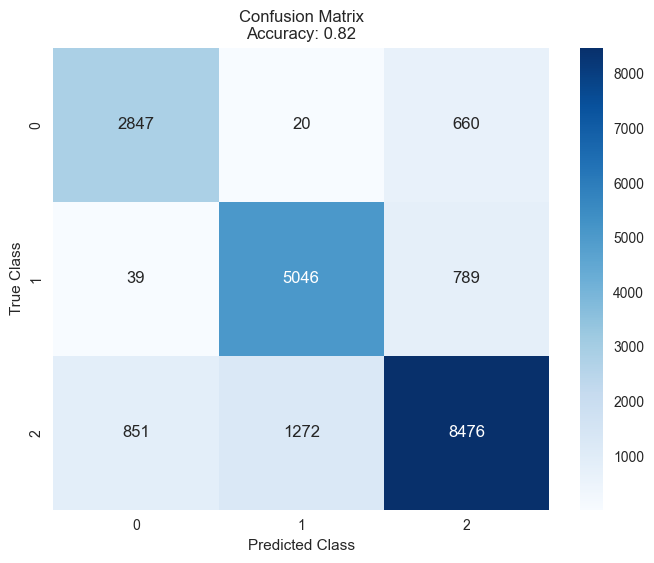

In [93]:

cm = confusion_matrix(y_test, y_pred_cv)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title(f"Confusion Matrix\nAccuracy: {accuracy:.2f}")
plt.show()


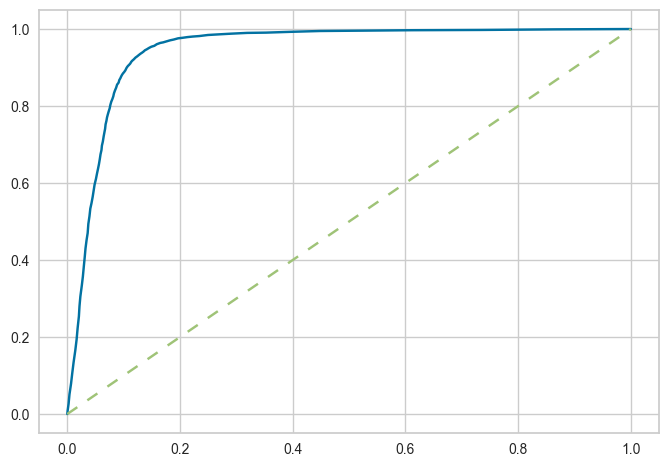

In [94]:


fpr, tpr, thresholds = roc_curve(y_test,
                                 grid_search.predict_proba(X_test)[:,1],
                                 pos_label=1)


plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(5, 5))
plt.show()


In [95]:


f1_rf = f1_score(y_test, y_pred_cv,  average='weighted')

print("f1_rf (binary): {}\n".format(f1_rf))
print(classification_report(y_test,y_pred_cv))

f1_rf (binary): 0.8186658858610328

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      3527
           1       0.80      0.86      0.83      5874
           2       0.85      0.80      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.80      0.82      0.81     20000
weighted avg       0.82      0.82      0.82     20000



 # Keeping only 10 features to predict the Credit Score

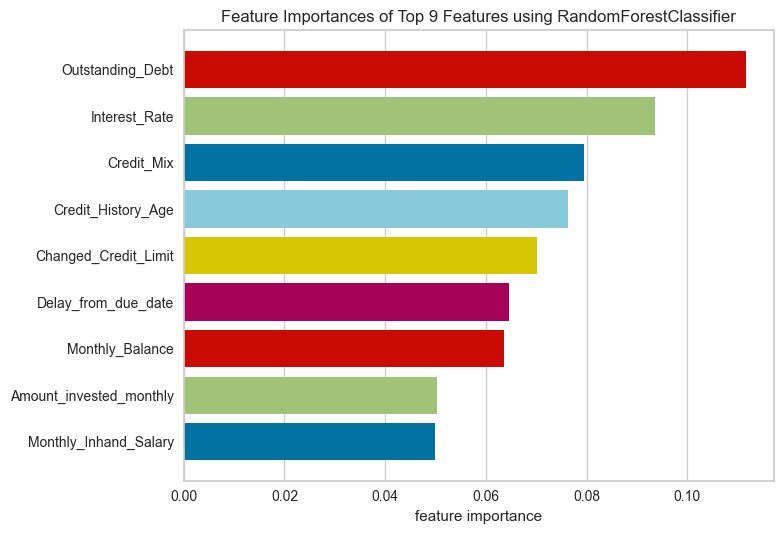

['Monthly_Inhand_Salary' 'Amount_invested_monthly' 'Monthly_Balance'
 'Delay_from_due_date' 'Changed_Credit_Limit' 'Credit_History_Age'
 'Credit_Mix' 'Interest_Rate' 'Outstanding_Debt']


In [96]:
model_rf = RandomForestClassifier(random_state=42, **best_params_rf)

# Plot feature importances
viz = feature_importances(model, X_test, y_test, relative=False, topn=9)

# get top 8 features
print(viz.features_)

In [97]:
# we selected 9 features for final model
df_final = df[viz.features_.tolist() + ['Credit_Score']]
df_final

,Monthly_Inhand_Salary,Amount_invested_monthly,Monthly_Balance,Delay_from_due_date,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Interest_Rate,Outstanding_Debt,Credit_Score
0,1824.843333,21.465380,312.494089,3,11.27,265,Good,3.0,809.98,Good
1,1824.843333,21.465380,284.629163,3,11.27,266,Good,3.0,809.98,Good
2,1824.843333,21.465380,331.209863,3,11.27,267,Good,3.0,809.98,Good
3,1824.843333,21.465380,223.451310,5,6.27,268,Good,3.0,809.98,Good
4,1824.843333,21.465380,341.489231,6,11.27,269,Good,3.0,809.98,Good
...,...,...,...,...,...,...,...,...,...,...
99995,3359.415833,24.028477,479.866228,23,11.50,378,Good,7.0,502.38,Poor
99996,3359.415833,24.028477,496.651610,18,11.50,379,Good,7.0,502.38,Poor
99997,3359.415833,24.028477,516.809083,27,11.50,380,Good,7.0,502.38,Poor
99998,3359.415833,24.028477,319.164979,20,11.50,381,Good,7.0,502.38,Standard


In [98]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Monthly_Inhand_Salary    100000 non-null  float64
 1   Amount_invested_monthly  100000 non-null  float64
 2   Monthly_Balance          100000 non-null  float64
 3   Delay_from_due_date      100000 non-null  int64  
 4   Changed_Credit_Limit     100000 non-null  float64
 5   Credit_History_Age       100000 non-null  int64  
 6   Credit_Mix               100000 non-null  object 
 7   Interest_Rate            100000 non-null  float64
 8   Outstanding_Debt         100000 non-null  float64
 9   Credit_Score             100000 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 7.6+ MB


In [99]:
X = df_final.drop(columns='Credit_Score')
y = df_final['Credit_Score']

In [100]:
cat = X.select_dtypes(include="object").columns.to_list()     
print('OrdinalEncoder:', cat)  
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

X_enc      = X.copy()
X_enc[cat] = enc.fit_transform(X_enc[cat])

X_enc.shape

OrdinalEncoder: ['Credit_Mix']


(100000, 9)

In [101]:
le = LabelEncoder()
y  = le.fit_transform(y)

In [102]:
smote = SMOTE(random_state=42)
X_enc, y = smote.fit_resample(X_enc, y)

In [103]:
final_model = RandomForestClassifier(random_state=42, **best_params_rf)

In [104]:
final_model.fit(X_enc, y)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53174
           1       1.00      1.00      1.00     53174
           2       1.00      1.00      1.00     53174

    accuracy                           1.00    159522
   macro avg       1.00      1.00      1.00    159522
weighted avg       1.00      1.00      1.00    159522



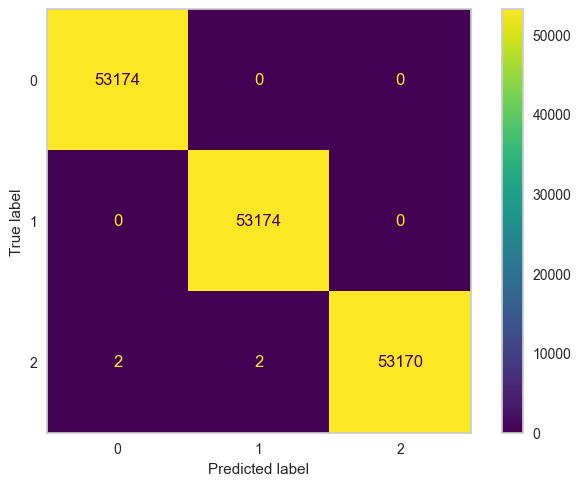

In [105]:
sns.set_style("whitegrid", {'axes.grid' : False})
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = final_model.predict(X_enc)

print(classification_report(y, y_pred))
ConfusionMatrixDisplay.from_estimator(final_model, X_enc, y)

In [106]:
np.bincount(y_pred)

array([53176, 53176, 53170], dtype=int64)

In [107]:
X.head()

,Monthly_Inhand_Salary,Amount_invested_monthly,Monthly_Balance,Delay_from_due_date,Changed_Credit_Limit,Credit_History_Age,Credit_Mix,Interest_Rate,Outstanding_Debt
0,1824.843333,21.46538,312.494089,3,11.27,265,Good,3.0,809.98
1,1824.843333,21.46538,284.629163,3,11.27,266,Good,3.0,809.98
2,1824.843333,21.46538,331.209863,3,11.27,267,Good,3.0,809.98
3,1824.843333,21.46538,223.451310,5,6.27,268,Good,3.0,809.98
4,1824.843333,21.46538,341.489231,6,11.27,269,Good,3.0,809.98


In [108]:
X.describe(include='O')

,Credit_Mix
count,100000
unique,3
top,Standard
freq,45848


In [109]:
mean_human = pd.concat([X.select_dtypes('number').mean().astype(int).to_frame().T, X.select_dtypes('object').mode()], axis=1)
mean_human.to_dict()

{'Monthly_Inhand_Salary': {0: 4197},
 'Amount_invested_monthly': {0: 55},
 'Monthly_Balance': {0: 392},
 'Delay_from_due_date': {0: 21},
 'Changed_Credit_Limit': {0: 10},
 'Credit_History_Age': {0: 221},
 'Interest_Rate': {0: 14},
 'Outstanding_Debt': {0: 1426},
 'Credit_Mix': {0: 'Standard'}}

In [110]:
mean_human[cat] = enc.transform(mean_human[cat])
mean_human

,Monthly_Inhand_Salary,Amount_invested_monthly,Monthly_Balance,Delay_from_due_date,Changed_Credit_Limit,Credit_History_Age,Interest_Rate,Outstanding_Debt,Credit_Mix
0,4197,55,392,21,10,221,14,1426,2.0


In [111]:
mean_human = mean_human[X_enc.columns]

In [112]:
predict = final_model.predict(mean_human)
predict, le.inverse_transform(predict)

(array([2]), array(['Standard'], dtype=object))

In [113]:
X_test_enc      = X_test[df_final.columns[:-1]].copy()
X_test_enc[cat] = enc.fit_transform(X_test_enc[cat])

X_test_enc.shape

(20000, 9)

In [114]:
y_test_pred = final_model.predict(X_test_enc)
pd.value_counts(y_test_pred).sort_index()

0    10830
2     9170
dtype: int64

In [115]:
np.bincount(y_test_pred)

array([10830,     0,  9170], dtype=int64)

100%|===================| 59936/60000 [03:40<00:00]        

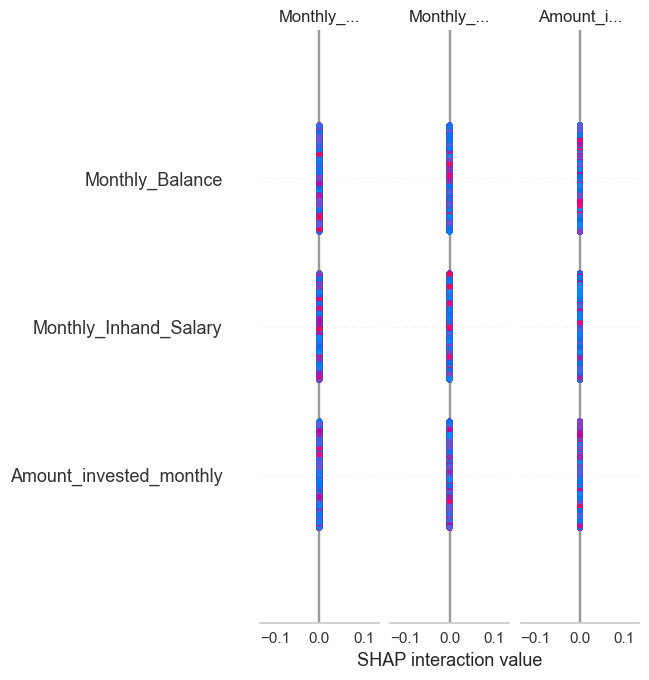

In [116]:
import shap

# Create an explainer object
explainer = shap.Explainer(final_model, X_test_enc)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_enc)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_enc)

In [117]:
save_model_dir = 'models/rf_final.pkl.gz'
print("Saving compressed model at: {}".format(save_model_dir))

# Save the model
with gzip.open(save_model_dir, 'wb') as handle:
    pickle.dump(final_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

Saving compressed model at: models/rf_final.pkl.gz


In [118]:
save_model_dir = os.path.join('models/cs_le.pkl')
print("Saving model at: {}".format(save_model_dir))

#save the model
with open(save_model_dir, 'wb') as handle:
    pickle.dump(le,
                handle,
                protocol=3)

Saving model at: models/cs_le.pkl


In [119]:
save_model_dir = os.path.join('models/cs_enc.pkl')
print("Saving model at: {}".format(save_model_dir))

#save the model
with open(save_model_dir, 'wb') as handle:
    pickle.dump(enc,
                handle,
                protocol=3)

Saving model at: models/cs_enc.pkl


In [120]:
df_final.to_csv('data/df_final.csv')